In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5,0.5,0.5))
])
common_kwargs_set = {
    "root":os.path.abspath('.').split(os.path.sep)[0]+os.path.sep+"cifardata",
    "transform":transform,
    "download":True}
common_kwargs_loader = {"batch_size":128,
                        "num_workers":4}
trainset = torchvision.datasets.CIFAR10(train=True, **common_kwargs_set)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, **common_kwargs_loader)

holdoutset = torchvision.datasets.CIFAR10(train=False, **common_kwargs_set)
holdoutLoader = torch.utils.data.DataLoader(holdoutset, shuffle=False, **common_kwargs_loader)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

Files already downloaded and verified
Files already downloaded and verified


In [9]:
print(f"Cuda avail: {torch.cuda.is_available()}")

Cuda avail: True


  car   cat plane  frog


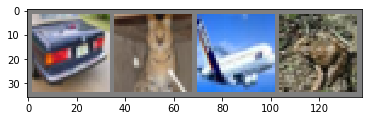

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = dataiter.next()
images, labels = images[:4], labels[:4]
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))
imshow(torchvision.utils.make_grid(images))

In [ ]:
from boilerplate import Net, ResNet, evaluate_network_opt
perf_rnn, rnn = evaluate_network_opt(
    trainloader, holdoutloader, ResNet, step_size=480,epochs_desired=123)

In [ ]:
perf_nonrnn, nonrnn = evaluate_network_opt(
    trainloader, holdoutloader, Net, step_size=480,epochs_desired=123)

In [ ]:
filtered = [list(filter(lambda x: x[1], perf_nonrnn.items())),
            list(filter(lambda x: x[1], perf_rnn.items()))]
import matplotlib.colors as colors
import random
random_colors = enumerate(random.sample(colors.get_named_colors_mapping().keys(), 10))
from matplotlib.pyplot import figure
def set_figsize(plots):
    fig, axs = plt.subplots(plots, 1, constrained_layout=True)
    fig.set_size_inches(11*plots, 8.5*plots)
    fig.dpi=80
    fig.facecolor="w"
    fig.edgecolor="k"
    return fig, axs
fig, axs = set_figsize(2)
for idx, title in enumerate(["Unmodified NN", "RNN (Custom Impl)"], 0):
    axs[idx].set_title(title)
for idx in range(2):
    axs[idx].set_xlabel(f"No. of {trainloader.batch_size} sample batches trained on")
    axs[idx].set_ylabel(f"AUC on holdout data")
colors = {idx:c for idx, c in random_colors}
for label in range(0, 10):
    for idx in range(2):
        axs[idx].plot(list(map(lambda d: d[0], filtered[idx])), # x
                      list(map(lambda d: d[1][label], filtered[idx])), # auc for label
                      colors[label],
                      label=classes[label])
for idx in range(2):
    axs[idx].legend()
images_dir = os.path.join(os.path.dirname(os.getcwd()), os.path.sep, "images")
fig.savefig(os.path.join(images_dir, "comparison.png"))
plt.show()